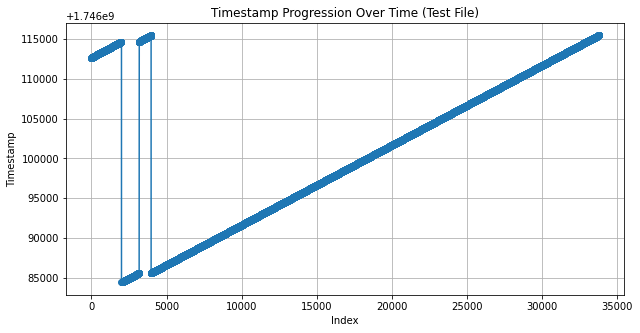

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.0f}'.format)

# Load the CSV file without skipping rows
file_path = "test ttfs_2025-05-01-15-17-55_TO_2025-05-01-15-51-21.csv"
df = pd.read_csv(file_path)

# Extract non-null timestamps and their original indices
timestamps = df['timestamp'].dropna().reset_index(drop=True)
timestamp_indices = df.index[df['timestamp'].notna()].tolist()

# 1) Abnormal timestamp differences (difference ≠ 1)
differences = timestamps.diff().dropna()
abnormal_ts_idx = differences[differences != 1].index
abnormal_ts = timestamps.loc[abnormal_ts_idx]
abnormal_diff = differences.loc[abnormal_ts_idx]
abnormal_utc = abnormal_ts.apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
abnormal_ts_df = pd.DataFrame({
    'timestamp': abnormal_ts,
    'difference': abnormal_diff,
    'UTC Time': abnormal_utc
})


# 2) Sampling frequency anomalies (sample_count ≠ 25)
sample_counts = []
for i in range(len(timestamp_indices) - 1):
    count = timestamp_indices[i + 1] - timestamp_indices[i]
    ts = timestamps.iloc[i]
    utc = datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    if count != 25:
        sample_counts.append((ts, count, utc))
sample_df2 = pd.DataFrame(sample_counts, columns=['timestamp', 'sample_count', 'UTC Time'])


# 3) Plot timestamp progression curve
plt.figure(figsize=(10, 5))
plt.plot(timestamps, marker='o', linestyle='-')
plt.xlabel("Index")
plt.ylabel("Timestamp")
plt.title("Timestamp Progression Over Time (Test File)")
plt.grid()
plt.show()


abnormal_ts_df.to_csv('abnormal_timestamps.csv', index=False)
sample_df2.to_csv('sampling_anomalies.csv', index=False)
